In [1]:
import numpy
import py_qip
from matplotlib import pyplot

# Rotor

One qubit in the center labeled $0$, project onto each pair $\langle 0, i \rangle$ with projector $t$

In [2]:
t = numpy.array([
    [1.,0.,0.,0.],
    [0.,.5,.5,0.],
    [0.,.5,.5,0.],
    [0.,0.,0.,1.],
], dtype=numpy.complex128)

N = 4
b = py_qip.Circuit(qubits=N)
for i in range(1, N):
    # Act on qubits 0 and i with matrix t
    b.apply_gate([0, i], t)
mat = b.get_circuit()

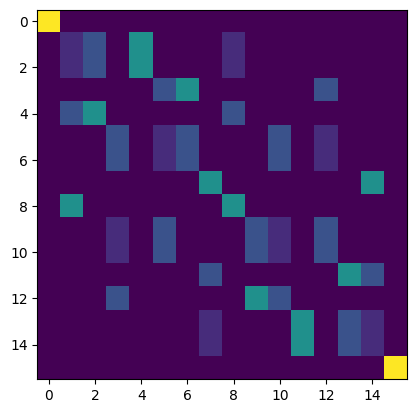

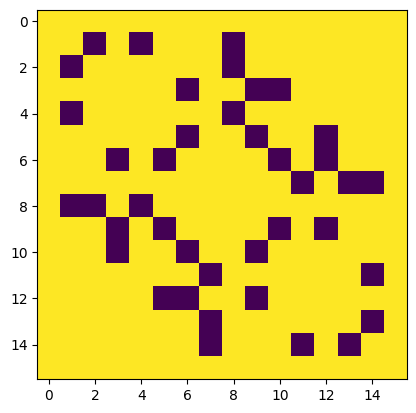

In [3]:
pyplot.imshow(mat.real)
pyplot.show()

pyplot.imshow(mat == mat.T)
pyplot.show()

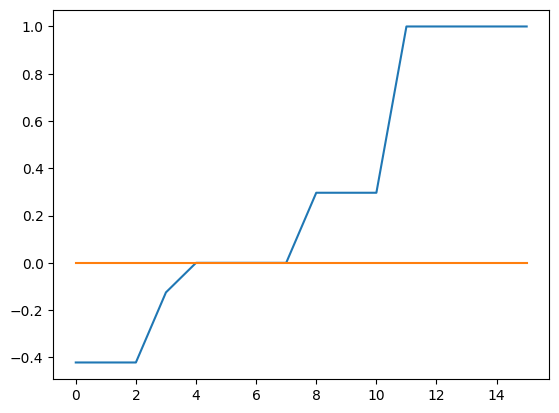

In [4]:
arr = numpy.array(sorted(numpy.linalg.eigvals(mat), key=lambda x: x.real))

pyplot.plot(arr.real)
pyplot.plot(arr.imag)
pyplot.show()

# Triangle of projectors

Project each pair $\langle i j \rangle$ on a closed loop.

In [5]:
t = numpy.array([
    [1.,0.,0.,0.],
    [0.,.5,.5,0.],
    [0.,.5,.5,0.],
    [0.,0.,0.,1.],
], dtype=numpy.complex128)

N = 3
b = py_qip.Circuit(qubits=N)
for i in range(0, N):
    b.apply_gate([i, (i+1)%N], t)
mat = b.get_circuit()

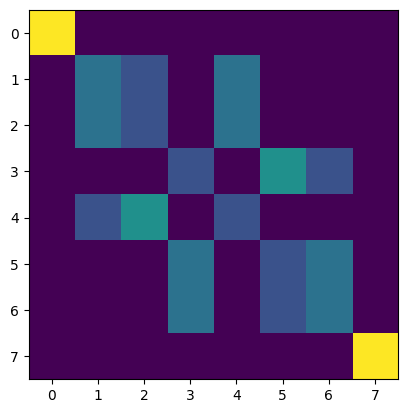

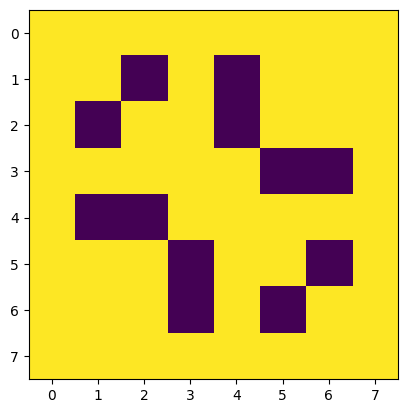

In [6]:
pyplot.imshow(mat.real)
pyplot.show()

pyplot.imshow(mat == mat.T)
pyplot.show()

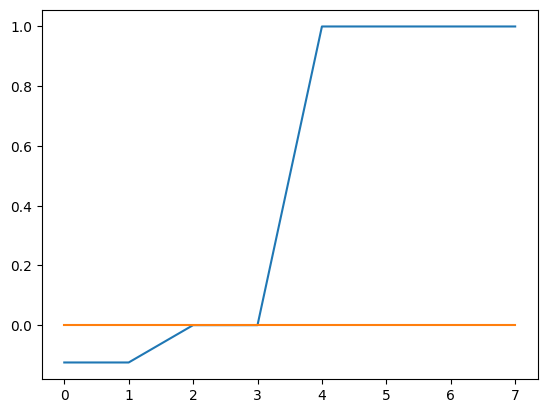

In [7]:
arr = numpy.array(sorted(numpy.linalg.eigvals(mat), key=lambda x: x.real))

pyplot.plot(arr.real)
pyplot.plot(arr.imag)
pyplot.show()

# Conjugate by $U$

In [8]:
from scipy.stats import unitary_group

In [9]:
u = unitary_group.rvs(4)
u

array([[ 0.26634296+0.63908782j,  0.24623985+0.35403423j,
         0.20213406+0.25481026j, -0.47619508-0.04588776j],
       [ 0.19310363-0.55072862j, -0.34114325+0.49746808j,
        -0.07298513-0.10803904j, -0.51558717-0.11281125j],
       [-0.20420443-0.30233376j,  0.46583894-0.14866656j,
         0.49151568-0.02640046j, -0.13673927-0.60564421j],
       [ 0.1708737 +0.13316979j,  0.40374426+0.21921544j,
        -0.52813926-0.59665615j,  0.13147338-0.2996469j ]])

In [10]:
t = numpy.array([
    [1.,0.,0.,0.],
    [0.,.5,.5,0.],
    [0.,.5,.5,0.],
    [0.,0.,0.,1.],
], dtype=numpy.complex128)
t = numpy.conjugate(u.T) @ t @ u

print(numpy.linalg.eigvals(t))

N = 4
b = py_qip.Circuit(qubits=N)
for i in range(1, N):
    b.apply_gate([0, i], t)
mat = b.get_circuit()

[1.00000000e+00-4.85164608e-18j 3.14862021e-17+1.00558165e-17j
 1.00000000e+00+4.16333634e-17j 1.00000000e+00+5.20417043e-17j]


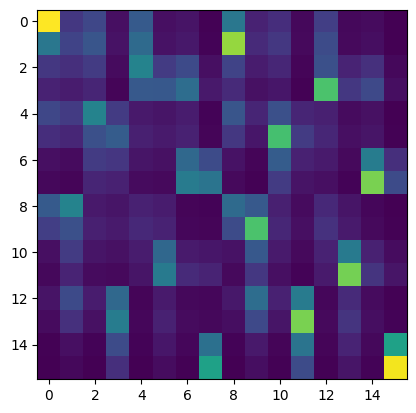

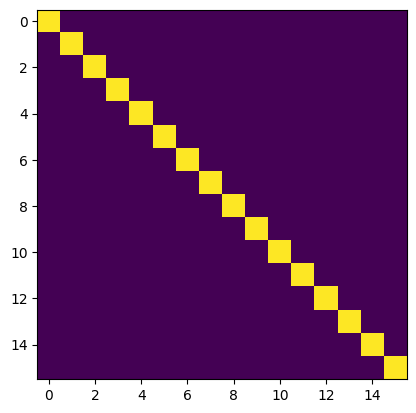

In [11]:
pyplot.imshow(numpy.abs(mat))
pyplot.show()

pyplot.imshow(mat == mat.T)
pyplot.show()

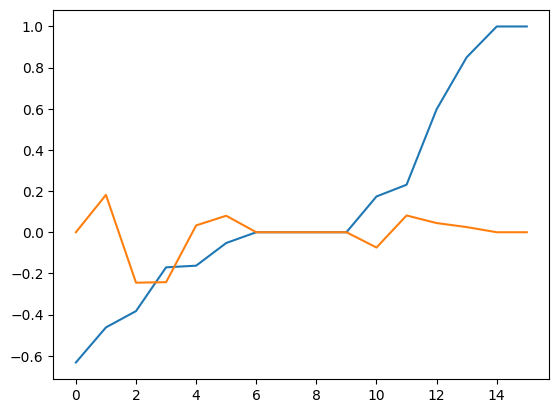

In [12]:
arr = numpy.array(sorted(numpy.linalg.eigvals(mat), key=lambda x: x.real))

pyplot.plot(arr.real)
pyplot.plot(arr.imag)
pyplot.show()